### Data Analysis of Customer Churn Prediction data

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [137]:
df = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

In [108]:
## Data Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

1. There are only 3 columns with numbers (SeniorCitizen, tenure, MonthlyCharges).
2. All other columns are categorical

### Checking Null values

In [110]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

remarks:-

1. There is no any null values in the data

In [111]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)
categorical_df = df.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'],axis=1)
categorical_df.drop('customerID',axis=1,inplace=True)
    

In [112]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').astype(float)

In [113]:
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_replace:
    df[column] = df[column].replace('No internet service', 'No')


In [135]:
categorical_df = df.select_dtypes(include='object')
for col in categorical_df.columns:
    print(col," : ",categorical_df[col].unique())
    
df.head(2)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [114]:
df.drop(['customerID'],axis=1,inplace=True)

In [115]:
categorical_df = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(data=df,columns=categorical_df,drop_first=True)
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [138]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [140]:
df_encoded['Contract_One year'].value_counts()
df_encoded['']

Contract_Two year
False    5347
True     1685
Name: count, dtype: int64

In [123]:
df_encoded.drop(['tenure'],axis=1,inplace=True)
df_encoded.drop(['MonthlyCharges'],axis=1,inplace=True)

In [117]:
numerical_df = df.select_dtypes(include='number')
numerical_df.drop(columns='SeniorCitizen',axis=1,inplace=True)

In [101]:
numerical_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


Remarks:
1. The data contains no outliers.

### Checking the Total number Churn_yes and no

/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn_Yes', ylabel='count'>

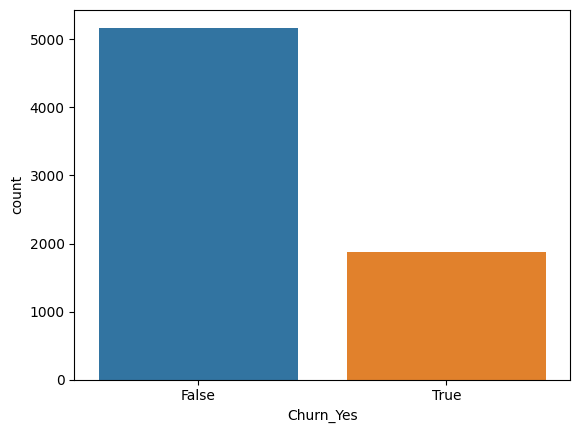

In [102]:
import seaborn as sns

sns.countplot(x='Churn_Yes',data=df_encoded)

Remarks:-
 It looks like the Churning No is more than churn_yes.

In [130]:
df_encoded.dropna(inplace=True)
X = df_encoded.drop('Churn_Yes',axis=1)
y = df_encoded['Churn_Yes']
X

,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,1889.50,True,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,108.15,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,1840.75,True,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,151.65,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1990.50,True,True,True,True,False,True,False,False,...,True,True,True,True,True,False,True,False,False,True
7039,0,7362.90,False,True,True,True,False,True,True,False,...,True,False,True,True,True,False,True,True,False,False
7040,0,346.45,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,306.60,True,True,False,True,False,True,True,False,...,False,False,False,False,False,False,True,False,False,True


In [69]:
len(X.columns)

24

In [143]:
X[:1]

,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=12)


classifier = LogisticRegression()
classifier.fit(X_train,y_train)

#prediction 
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result['Actual'].value_counts()

/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceW

Actual
False    1062
True      345
Name: count, dtype: int64

In [170]:
result['Predicted'].value_counts()
accuracy_score1 = accuracy_score(y_true=y_test,y_pred=y_pred)
accuracy_score1

0.798862828713575

In [45]:
data_point = 
# Convert the data point to a DataFrame with a single row
data_point_df = pd.DataFrame([data_point])

# Use the trained classifier to make a prediction for the single data point
prediction = classifier.predict(data_point_df)

# The 'prediction' variable now contains the predicted outcome (0 or 1)
prediction


/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([False])

In [124]:
import json
import pandas as pd
import numpy as np

data_point = {
    'SeniorCitizen': int(True),
    'tenure': 2.0,
    'MonthlyCharges': 120.0,
    'TotalCharges': 149.99,
    'gender_Male': int(True),
    'Partner_Yes': int(True),
    'Dependents_Yes': int(True),
    'PhoneService_Yes': int(True),
    'MultipleLines_No phone service': int(True),
    'MultipleLines_Yes': int(False),
    'InternetService_Fiber optic': int(False),
    'InternetService_No': int(False),
    'OnlineSecurity_No internet service': int(True),
    'OnlineSecurity_Yes': int(True),
    'OnlineBackup_No internet service': int(True),
    'OnlineBackup_Yes': int(True),
    'DeviceProtection_No internet service': int(True),
    'DeviceProtection_Yes': int(True),
    'TechSupport_No internet service': int(True),
    'TechSupport_Yes': int(True),
    'StreamingTV_No internet service': int(True),
    'StreamingTV_Yes': int(False),
    'StreamingMovies_No internet service': int(False),
    'StreamingMovies_Yes': int(True),
    'Contract_One year': int(True),
    'Contract_Two year': int(True),
    'PaperlessBilling_Yes': int(True),
    'PaymentMethod_Credit card (automatic)': int(True),
    'PaymentMethod_Electronic check': int(True),
    'PaymentMethod_Mailed check': int(True)
}

# Convert the data point to a Series and then to a DataFrame
data_point_series = pd.Series(data_point)
data_point_df = pd.DataFrame(data_point_series).T

# Convert the DataFrame to a JSON list
json_list = json.loads(data_point_df.to_json(orient="records"))
data = np.array(json_list)
prediction = classifier.predict(data_point_df)
prediction

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DeviceProtection_No internet service
- OnlineBackup_No internet service
- OnlineSecurity_No internet service
- StreamingMovies_No internet service
- StreamingTV_No internet service
- ...


In [132]:
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

Confusion Matrix 
 [[946 116]
 [167 178]]


Text(0.5, 23.52222222222222, 'Predicted label')

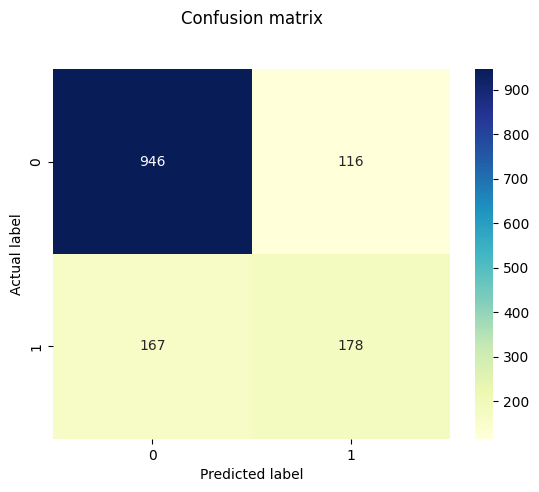

In [133]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [134]:
print("Accuracy of the model")
print(accuracy_score(y_test,y_pred)*100,'%')

Accuracy of the model
79.8862828713575 %


In [84]:
79.95735607675905 %

,SeniorCitizen,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,1889.50,True,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,0,108.15,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,1840.75,True,False,False,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,151.65,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1990.50,True,True,True,True,False,True,False,False,...,True,True,True,True,True,False,True,False,False,True
7039,0,7362.90,False,True,True,True,False,True,True,False,...,True,False,True,True,True,False,True,True,False,False
7040,0,346.45,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,306.60,True,True,False,True,False,True,True,False,...,False,False,False,False,False,False,True,False,False,True


In [136]:
X.columns

Index(['SeniorCitizen', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X[:10:15].info()

NameError: name 'X' is not defined

In [ ]:

X.iloc[:, 19:30].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   TechSupport_Yes                        7032 non-null   bool 
 1   StreamingTV_No internet service        7032 non-null   bool 
 2   StreamingTV_Yes                        7032 non-null   bool 
 3   StreamingMovies_No internet service    7032 non-null   bool 
 4   StreamingMovies_Yes                    7032 non-null   bool 
 5   Contract_One year                      7032 non-null   bool 
 6   Contract_Two year                      7032 non-null   bool 
 7   PaperlessBilling_Yes                   7032 non-null   bool 
 8   PaymentMethod_Credit card (automatic)  7032 non-null   bool 
 9   PaymentMethod_Electronic check         7032 non-null   bool 
 10  PaymentMethod_Mailed check             7032 non-null   bool 
dtypes: bool(11)
memory usage: 130.5 KB


In [ ]:
X.columns

NameError: name 'X' is not defined

In [144]:
df[:1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [161]:
churn_yes = df[df['Churn']=='Yes']
churn_yes.head()
for column in churn_yes.columns:
    print(f"{column}: {churn_yes.iloc[0][column]}")

customerID: 3668-QPYBK
gender: Male
SeniorCitizen: 0
Partner: No
Dependents: No
tenure: 2
PhoneService: Yes
MultipleLines: No
InternetService: DSL
OnlineSecurity: Yes
OnlineBackup: Yes
DeviceProtection: No
TechSupport: No
StreamingTV: No
StreamingMovies: No
Contract: Month-to-month
PaperlessBilling: Yes
PaymentMethod: Mailed check
MonthlyCharges: 53.85
TotalCharges: 108.15
Churn: Yes


In [153]:
churn_yes.iloc[:1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [164]:
y.value_counts()

Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict churn on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_str}')


/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Accuracy: 0.7860696517412935
Confusion Matrix:
[[948 114]
 [187 158]]
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1062
        True       0.58      0.46      0.51       345

    accuracy                           0.79      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.79      0.78      1407



/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/rashid/miniconda3/envs/customer_churn/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
